# Assignment-4-SLR-Q1

1) Delivery_time -> Predict delivery time using sorting time

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
dt_st=pd.read_csv("delivery_time.csv")

In [8]:
dt_st.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
dt_st=dt_st.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })
# renaming the columns

In [10]:
print(dt_st)

       dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [11]:
dt_st.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

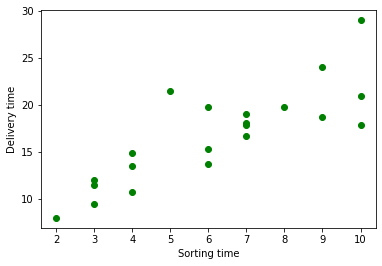

In [12]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x276b457fd60>,
 'caps': [<matplotlib.lines.Line2D at 0x276b4596400>,
 'boxes': [<matplotlib.lines.Line2D at 0x276b457f910>],
 'medians': [<matplotlib.lines.Line2D at 0x276b4596b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x276b4596eb0>],
 'means': []}

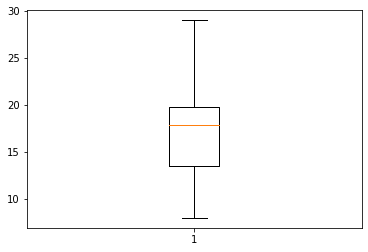

In [13]:
plt.boxplot(dt_st.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

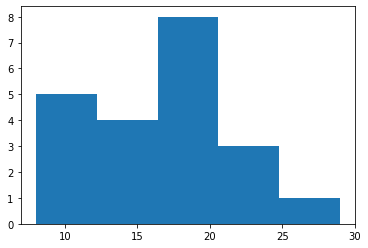

In [30]:
plt.hist(dt_st.dt, bins=5)

In [15]:
dt_st["dt_Sq"] = dt_st.dt**2
model_quad = smf.ols("np.log(st)~dt+dt_Sq",data=dt_st).fit()
# model_quad.params
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(st)   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     34.62
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           6.77e-07
Time:                        19:19:37   Log-Likelihood:                 3.2337
No. Observations:                  21   AIC:                           -0.4673
Df Residuals:                      18   BIC:                             2.666
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7780      0.450     -1.730      0.101      -1.723       0.167
dt             0.2272      0.052      4.346      0.000       0.117       0.337
dt_Sq         -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
dt_st

,dt,st,dt_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [17]:
np.exp(model_quad.predict(dt_st[["dt","dt_Sq"]]))

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [18]:
model2=smf.ols('dt~np.log(dt)',data=dt_st).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     499.4
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           4.20e-15
Time:                        19:19:37   Log-Likelihood:                -28.680
No. Observations:                  21   AIC:                             61.36
Df Residuals:                      19   BIC:                             63.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6423      1.956    -13.623      0.000     -30.736     -22.549
np.log(dt)    15.6528      0.700     22.347      0.000      14.187      17.119
==============================================================================
Omnibus:                       17.829   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.372
Skew:                           1.859   Prob(JB):                     0.000102
Kurtosis:                       5.679   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2.params

Intercept    -26.642292
np.log(dt)    15.652824
dtype: float64

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     499.4
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           4.20e-15
Time:                        19:19:37   Log-Likelihood:                -28.680
No. Observations:                  21   AIC:                             61.36
Df Residuals:                      19   BIC:                             63.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6423      1.956    -13.623      0.000     -30.736     -22.549
np.log(dt)    15.6528      0.700     22.347      0.000      14.187      17.119
==============================================================================
Omnibus:                       17.829   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.372
Skew:                           1.859   Prob(JB):                     0.000102
Kurtosis:                       5.679   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model3=smf.ols("dt~np.log(st)",data=dt_st).fit()

In [22]:
model3.params


Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [23]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        19:19:37   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-30.735721,-22.548863
np.log(dt),14.186754,17.118894


In [25]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [26]:
pred2 = model2.predict(dt_st)

In [27]:
pred3 = model3.predict(dt_st) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

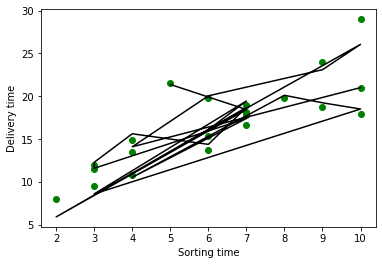

In [28]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.plot(dt_st.st, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

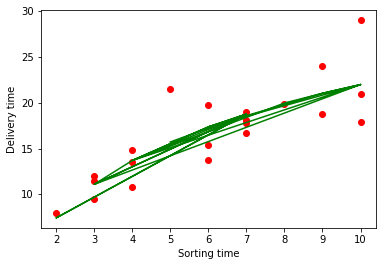

In [29]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='red')
plt.plot(dt_st.st, pred3,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")